# Lesson 4 Exercise Solutions

## Exercise 1: Visualizing the Spectra of Ganymede
Ganymede is the largest moon of Jupiter and the largest moon in the entire solar system. In this exercise, you will be analyzing the spectra FITS data for Ganymede and visualizing it using `matplotlib` and `specutils`.

![https://cdn.mos.cms.futurecdn.net/TM4enFnEmbQzdcQaHKToV3.jpg](https://cdn.mos.cms.futurecdn.net/TM4enFnEmbQzdcQaHKToV3.jpg)

[Image Source](https://www.space.com/16440-ganymede-facts-about-jupiters-largest-moon.html)

#### Objectives:
- Import the FITS file for Ganymede (`ganymede.fits`) using `fits` from `astropy.io`
- Print out general info and header data about the FITS file
- Use the `Spectrum1D` function from `specutils` to interpret the data
- Plot the spectra using `matplotlib`

In [1]:
from astropy.io import fits
from specutils import Spectrum1D
from astropy.visualization import quantity_support
import matplotlib.pyplot as plt

In [2]:
file = fits.open('../ganymede.fits')
file.info()

Filename: ../ganymede.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    2731   (313025,)   float32   


In [9]:
header = file[0].header
print(header[:5])

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =               313025 / length of data axis 1                          EXTEND  =                    T / FITS dataset may contain extensions            END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [10]:
spectra = Spectrum1D.read(file)
spectra

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


<Spectrum1D(flux=[0.3924199640750885 ... 0.46513596177101135]  (shape=(313025,), mean=0.47252); spectral_axis=<SpectralAxis [3783.22 3783.23 3783.24 ... 6913.44 6913.45 6913.46] Angstrom> (length=313025))>

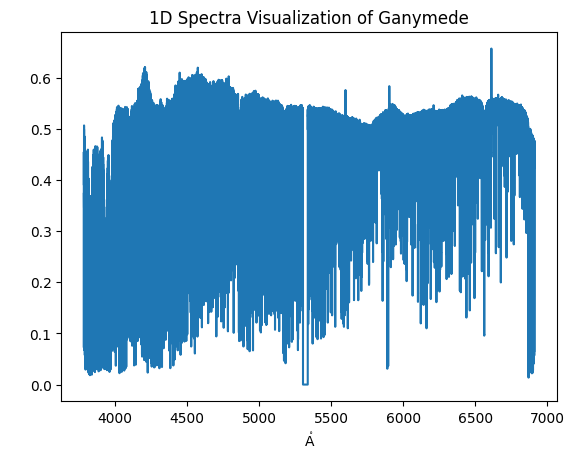

In [11]:
quantity_support()
fig, ax = plt.subplots()
plt.title("1D Spectra Visualization of Ganymede")
ax.step(spectra.spectral_axis, spectra.flux)

## Exercise 2: Generate a False Color Composite
You are an accredited geospatial remote sensing analyst and are given the task of processing satellite bands to create a false color composite image. A False Color Composite is a band combination that enhances vegetation and helps in distinguishing between healthy and stressed vegetation.

#### Objectives:
- Import the same Sentinel Satellite bands as above using `glob` and sort them
- Process the data using `rasterio` and then place it using a `numpy` stack
- Plot the False Color Composite using `earthpy`

#### HINT
The False Color Composite is created using a combination of NIR (Near Infrared), Red, and Green bands.

Band breakdown:

`Near Infrared` = Band #4

`Red` = Band #3

`Green` = Band #2

In [12]:
import numpy as np
from glob import glob
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [13]:
np.seterr(divide='ignore', invalid='ignore')
bands = glob("../satellite-bands/*B?*.tiff")
bands.sort()

In [15]:
data = []
for band in bands:
    with rio.open(band, 'r') as file:
        data.append(file.read(1))
stack_data = np.stack(data)

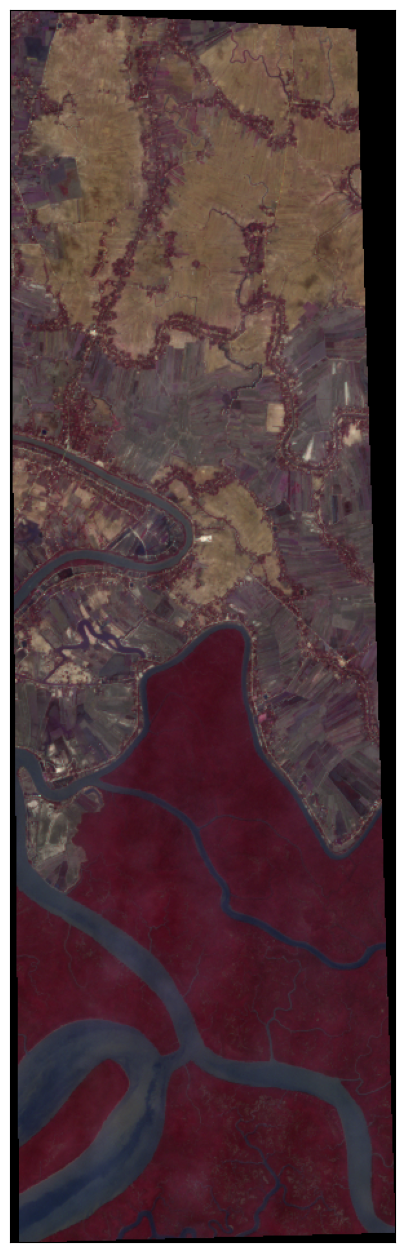

In [16]:
rgb = ep.plot_rgb(stack_data, 
                  rgb=(4, 3, 2), 
                  figsize=(10, 16))
plt.show()